[View in Colaboratory](https://colab.research.google.com/github/hawk-knight/VM/blob/master/Minimum_Spanning_Tree_Example.ipynb)

In [0]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
N=10
M=4
V = pd.DataFrame(abs(np.random.rand(N,2)), columns=list('XY'))
U = pd.DataFrame(abs(np.random.rand(M,2)*2.5), columns=list('XY'))
W = V.append(U, ignore_index=True)


In [4]:
print("---V---")
for x in range (len (V)):
    print (x,'   ',np.around(V['X'][x],decimals=4),'   ',np.around(V['Y'][x],decimals=4))
print("---U---")
for x in range (len (U)):
    print (x,'   ',np.around(U['X'][x],decimals=4),'   ',np.around(U['Y'][x],decimals=4))
print("---W---")    
for x in range (len (W)):
    print (x,'   ',np.around(W['X'][x],decimals=4),'   ',np.around(W['Y'][x],decimals=4))

---V---
0     0.3782     0.8769
1     0.8051     0.3305
2     0.8799     0.8096
3     0.9621     0.7351
4     0.8707     0.182
5     0.2963     0.0829
6     0.0777     0.4536
7     0.6196     0.334
8     0.2359     0.6493
9     0.7711     0.9425
---U---
0     1.0552     2.4813
1     1.3477     2.2267
2     0.2826     1.9375
3     2.4093     0.1115
---W---
0     0.3782     0.8769
1     0.8051     0.3305
2     0.8799     0.8096
3     0.9621     0.7351
4     0.8707     0.182
5     0.2963     0.0829
6     0.0777     0.4536
7     0.6196     0.334
8     0.2359     0.6493
9     0.7711     0.9425
10     1.0552     2.4813
11     1.3477     2.2267
12     0.2826     1.9375
13     2.4093     0.1115


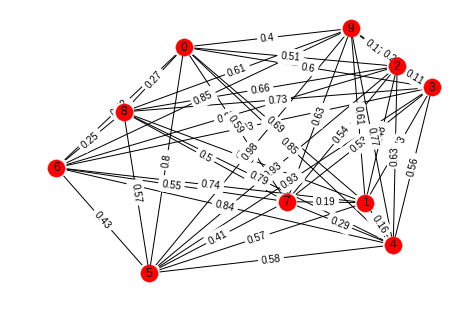

In [5]:
G = nx.Graph()
labels=dict({})
for i in range(N):
    G.add_node(i,pos=(V['X'][i],V['Y'][i]))
    for j in range(N):
            w =( (V['X'][i]-V['X'][j])**2+(V['Y'][i]-V['Y'][j])**2)**0.5
            G.add_edge(i,j, weight=w )
            labels.update({(i,j):round(w,2)})
           
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos,with_labels=True)
#labels = nx.get_edge_attributes(G,'weight')
edges=nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig('labeledgraph')

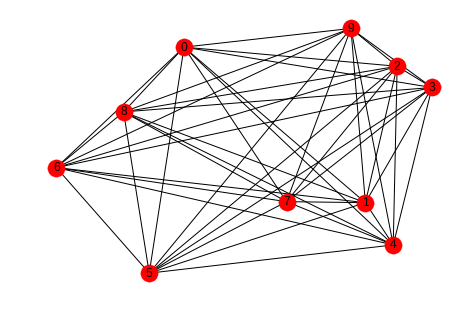

In [6]:
#nx.draw_networkx(G)
nx.draw(G,pos,with_labels=True,edge_labels=labels) 
plt.savefig('graph')

[(0, 8), (0, 9), (1, 4), (1, 7), (2, 3), (2, 9), (5, 6), (5, 7), (6, 8)]


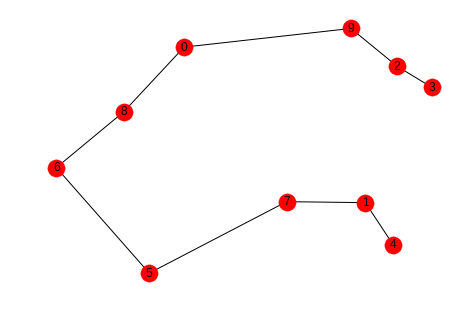

In [8]:
mst = nx.tree.minimum_spanning_edges(G, algorithm='kruskal', data=False)
edgelist = list(mst)
print(sorted(edgelist))
T = nx.minimum_spanning_tree(G, algorithm='kruskal')
nx.draw(T,pos,with_labels=True,edge_labels=labels) 
#edges=nx.draw_networkx_edge_labels(T,pos,edge_labels=labels)
plt.savefig('mintree')


In [0]:
G1=G.copy()
G1.add_node(len(G1),pos=(U['X'][0],U['Y'][0]),color='#fcff00')
G1.add_node(len(G1),pos=(U['X'][1],U['Y'][1]),color='#fcff00')
G1.add_node(len(G1),pos=(U['X'][2],U['Y'][2]),color='#fcff00')
G1.add_node(len(G1),pos=(U['X'][3],U['Y'][3]),color='#fcff00')

pos=nx.get_node_attributes(G1,'pos')
color = [G1.node[i].get('color', '#88b0f3')
        for i in range(N+4)]

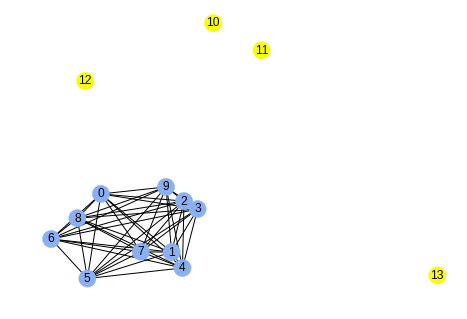

In [11]:
nx.draw(G1,pos,with_labels=True,node_color=color)

[(0, 8), (0, 9), (1, 4), (1, 7), (2, 3), (2, 9), (5, 6), (5, 7), (6, 8)]


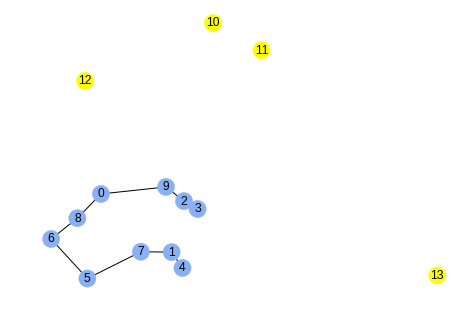

In [12]:
mst = nx.tree.minimum_spanning_edges(G1, algorithm='kruskal', data=False)
edgelist = list(mst)
print(sorted(edgelist))
T1 = nx.minimum_spanning_tree(G1, algorithm='kruskal')
nx.draw(T1,pos,with_labels=True,edge_labels=labels,node_color=color) 
#edges=nx.draw_networkx_edge_labels(T,pos,edge_labels=labels)
plt.savefig('mintree1')